# Supervised classification with DeapLearning

### Importin the libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from helpers import undersampling

### Preprocessing

In [2]:
df_unchange = pd.read_csv('data.csv')
df = undersampling(df_unchange)
X = df.iloc[:,1:14].to_numpy()
Y = df.iloc[:,-4:].to_numpy()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

Feature scaling
$$x = \frac{\overline{x} - x}{\sigma_{x}}$$

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

TO DO Cross Validation

### Model definition

In [5]:
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')
])

In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Training

In [7]:
model.fit(X_train, y_train, epochs=10, batch_size=1000)

Epoch 1/10
301/301 [==============================] - 2s 5ms/step - loss: 0.2866 - accuracy: 0.7439
Epoch 2/10
301/301 [==============================] - 2s 6ms/step - loss: 0.2533 - accuracy: 0.7783
Epoch 3/10
301/301 [==============================] - 2s 6ms/step - loss: 0.2405 - accuracy: 0.7916
Epoch 4/10
301/301 [==============================] - 2s 5ms/step - loss: 0.2323 - accuracy: 0.8000
Epoch 5/10
301/301 [==============================] - 2s 6ms/step - loss: 0.2267 - accuracy: 0.8060
Epoch 6/10
301/301 [==============================] - 2s 6ms/step - loss: 0.2224 - accuracy: 0.8110
Epoch 7/10
301/301 [==============================] - 2s 6ms/step - loss: 0.2192 - accuracy: 0.8133
Epoch 8/10
301/301 [==============================] - 2s 6ms/step - loss: 0.2169 - accuracy: 0.8160
Epoch 9/10
301/301 [==============================] - 2s 6ms/step - loss: 0.2149 - accuracy: 0.8169
Epoch 10/10
301/301 [==============================] - 2s 5ms/step - loss: 0.2135 - accuracy: 0.8184

### Validation

In [8]:
_, accuracy = model.evaluate(X_test, y_test)
print(f'acc: {accuracy}')

4028/4028 [==============================] - 4s 1ms/step - loss: 0.2038 - accuracy: 0.8275
acc: 0.8274912238121033


### Predictions

In [9]:
y_pred = model.predict(X_test)

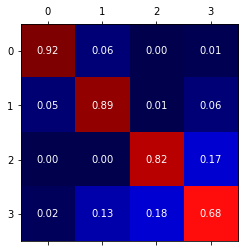

In [10]:
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
fig, ax = plt.subplots()
cm = cm/(0.25*X_test.shape[0])
ax.matshow(cm, cmap='seismic')
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center',color = 'white')
plt.show()

### Results Presentation

In [25]:
X_present = df_unchange.iloc[:,1:14].to_numpy()
X_present = sc.fit_transform(X_present)
Y_present = model.predict(X_present)
Y_present = Y_present.reshape((1830,1830,4))

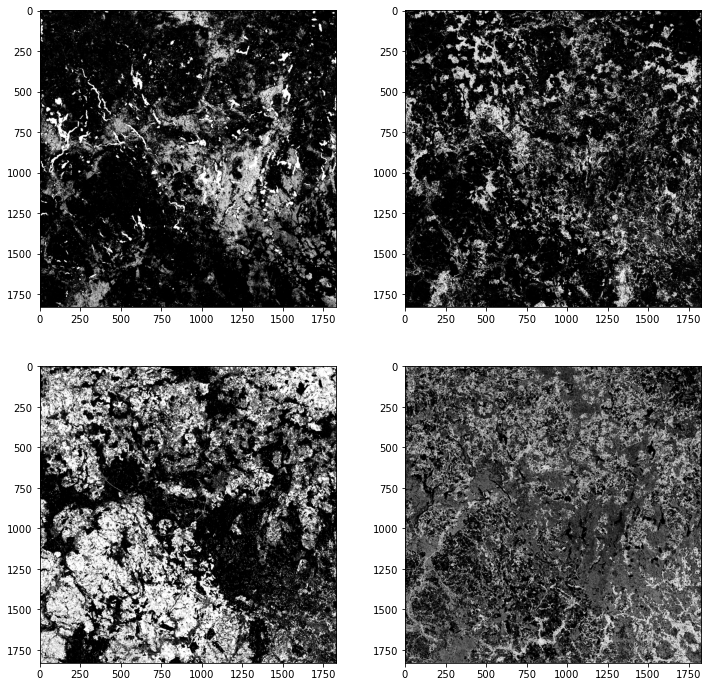

In [27]:
fig, axs = plt.subplots(figsize=(12,12), ncols = 2, nrows=2)
axs[0,0].imshow(Y_present[...,0]*255,cmap='gray', vmin=0, vmax=255)
axs[0,1].imshow(Y_present[...,1]*255,cmap='gray', vmin=0, vmax=255)
axs[1,0].imshow(Y_present[...,2]*255,cmap='gray', vmin=0, vmax=255)
axs[1,1].imshow(Y_present[...,3]*255,cmap='gray', vmin=0, vmax=255)